# AD&D Churn Analysis And Modeling

To:&nbsp;&nbsp;&nbsp;&nbsp; [Magnimind](https://magnimindacademy.com/)

From: Matt Curcio, matt.curcio.us@gmail.com

Date: 2022-12-27

Re:&nbsp;&nbsp;&nbsp; Churn Analysis from 10/5/2022 to 11/5/2022


## PCA of Churn Data Using Erdogant-PCA-Library

- The [Erdogant_PCA_Library](https://erdogant.github.io/pca/pages/html/index.html) is easy to use and gives the:
  - PC1 vs PC2 plot (bigram plot)
  - Scree plot
  - Model results **all very quickly**

- The Model results table indicates 12 Principal Components are sufficient to explain 99% of the cumulative variance.

In [4]:
import pandas as pd
import numpy as np

import pca
print('PCA version:',pca.__version__)
from pca import pca # See:https://erdogant.github.io/pca/pages/html/index.html

PCA version: 1.9.2


In [5]:
path = '../data/processed/'
fileName = "mcc_clean_churn.csv"

df = pd.read_csv(path+fileName)

df.drop(columns=['Churned'], inplace=True) # Drop Y variable

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [17] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [17] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': '12 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (12.1% expl.var)', ylabel='PC2 (11.8% expl.var)'>)

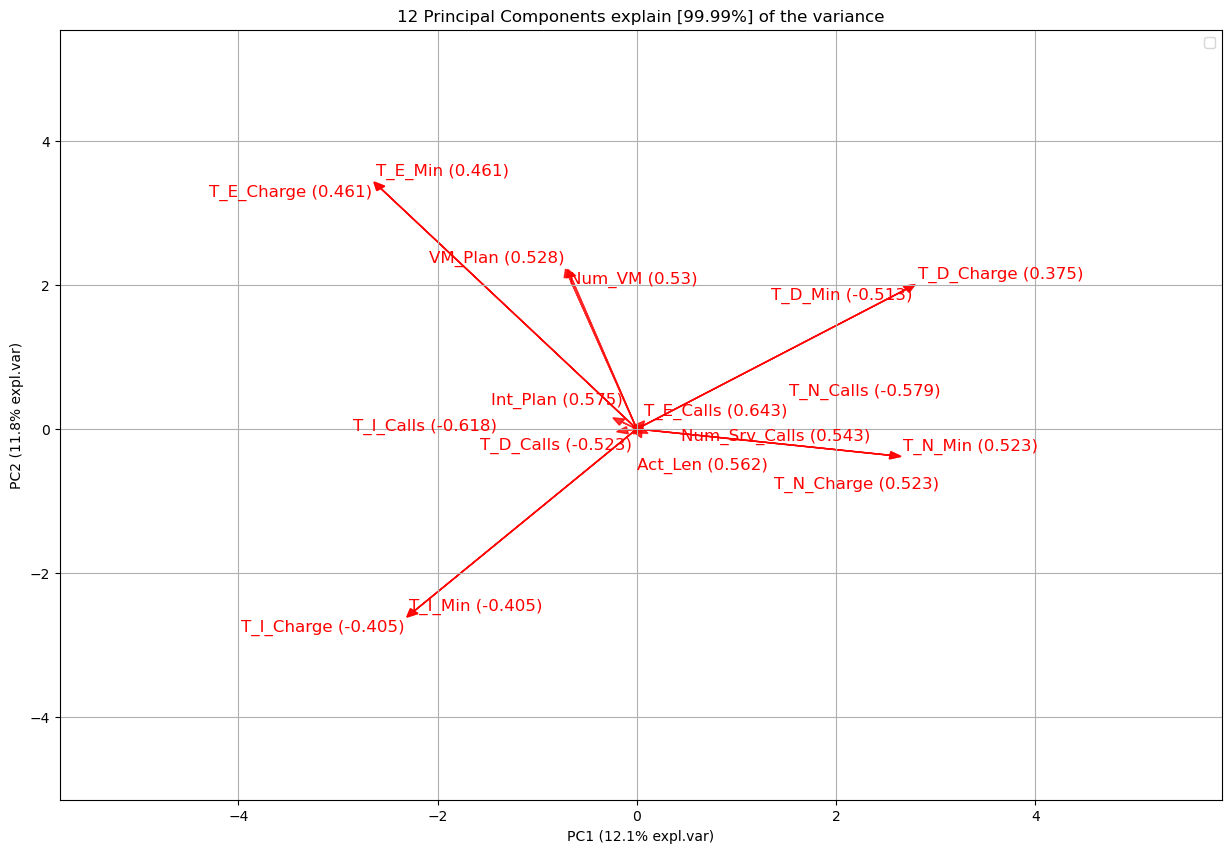

In [12]:
# Plot 1st and 2nd Principal Componennts
model = pca(normalize=True)

results = model.fit_transform(df)

# Set plot parameters: 
# cmap to None and label and legend to False, only Vectors will be plotted.
model.biplot(cmap=None, label=None, legend=True)

- The plot above is the loadings of the first Principal Component (PC1) vs the second Principal Component (PC2).

- It is interesting to note that many of the lines indicate collinearity exactly similar to the Correlation Coefficients calculated in  **4_ADD_Correlations_Cont_Cat_Vars.ipynb**.

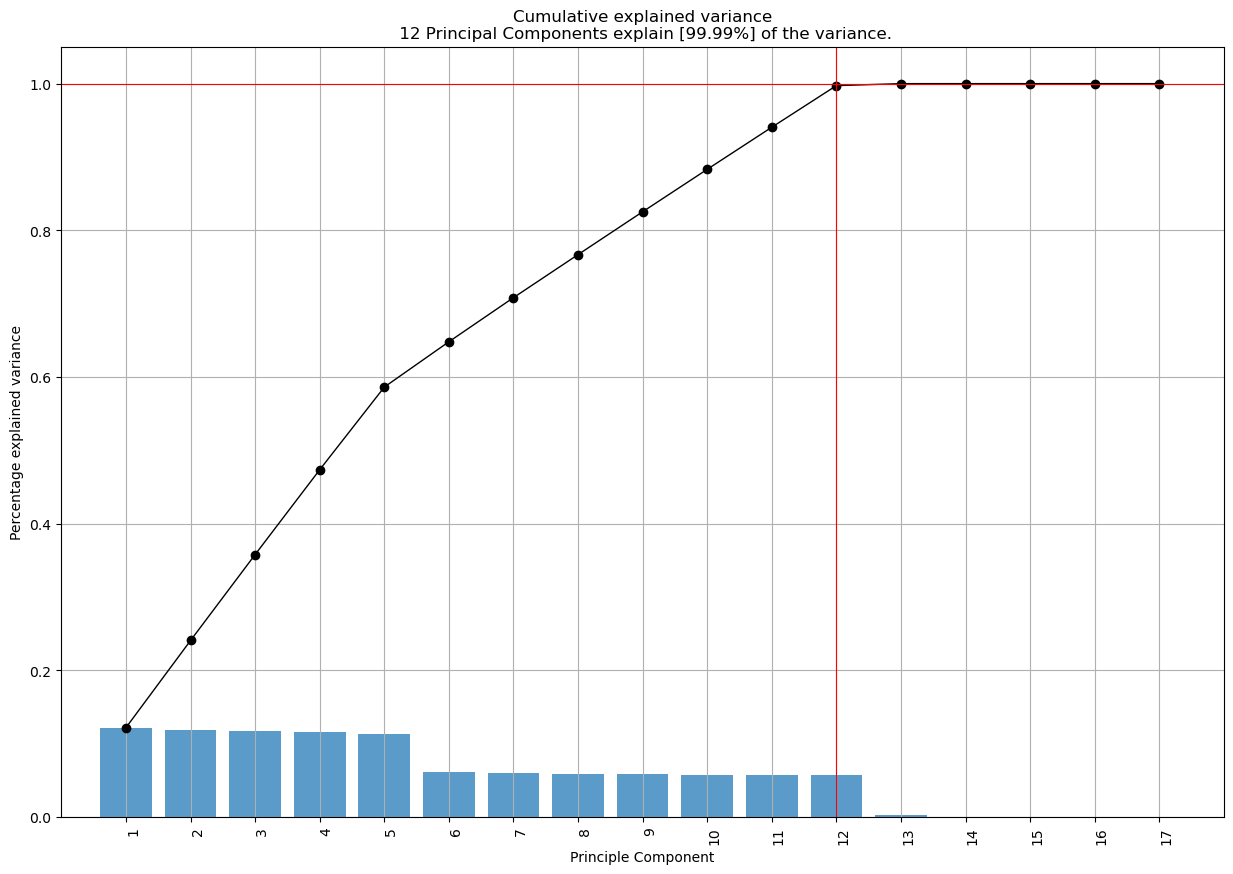

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Cumulative explained variance\n 12 Principal Components explain [99.99%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot Scree Plot
model.plot()

In [17]:
print(model.results['topfeat'])

      PC        feature   loading  type
0    PC1     T_D_Charge  0.375481  best
1    PC2        T_E_Min  0.460669  best
2    PC3        T_N_Min  0.522581  best
3    PC4        T_D_Min -0.512735  best
4    PC5         Num_VM  0.529692  best
5    PC6        Act_Len  0.561730  best
6    PC7      T_N_Calls -0.578512  best
7    PC8      T_I_Calls -0.617944  best
8    PC9      T_E_Calls  0.643434  best
9   PC10      T_N_Calls  0.605848  best
10  PC11      T_D_Calls -0.522958  best
11  PC12        Act_Len  0.620155  best
12   PC9       Int_Plan  0.574743  weak
13   PC5        VM_Plan  0.528373  weak
14   PC2     T_E_Charge  0.460650  weak
15   PC3     T_N_Charge  0.522581  weak
16   PC4        T_I_Min -0.405356  weak
17   PC4     T_I_Charge -0.405352  weak
18   PC7  Num_Srv_Calls  0.542518  weak
